In [ ]:
from tensorflow.keras.models import load_model, Model
from keras.engine.keras_tensor import KerasTensor
from typing import List
import numpy as np
from utils.audio_tools import load_and_convert_audio_into_mel_spectrogram
from utils.displays import display_mel_spectrogram
from utils.audio_tools import create_audio_player

PATH_TO_MODEL: str = '../runs/models/model_0/epoch-26.pb'
PATH_TO_AUDIO: str = '../media/audio/string_a#.wav'
NUM_LAYERS: int = 44

In [ ]:
input_data: np.ndarray = load_and_convert_audio_into_mel_spectrogram(PATH_TO_AUDIO, True, 1.0)
mel_spec = input_data.reshape(300, 44)

print(mel_spec)

display_mel_spectrogram(mel_spec)

In [ ]:
create_audio_player(mel_spec, mel_n_iterations=20)

In [ ]:
model: Model = load_model(PATH_TO_MODEL)
layer_output: List[KerasTensor] = [layer.output for layer in model.layers[:NUM_LAYERS]]
activation_model = Model(inputs=model.input, outputs=layer_output)

In [ ]:
layers: List[Model] = activation_model.layers
conv_block_indicis: List[int] = []

for i, layer in enumerate(layers):
    if 'conv_block' in layer.name:
        conv_block_indicis.append(i)

(1, 300, 44, 128)


<Figure size 432x288 with 0 Axes>

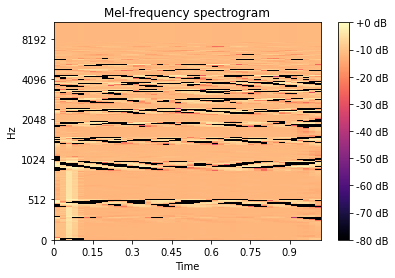

<Figure size 432x288 with 0 Axes>

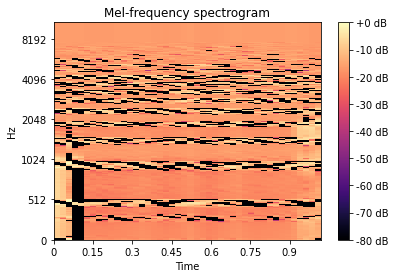

<Figure size 432x288 with 0 Axes>

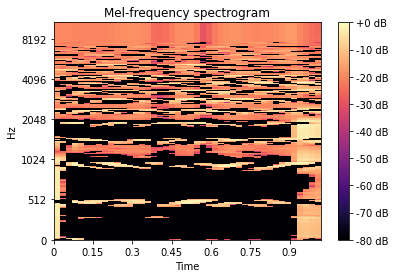

<Figure size 432x288 with 0 Axes>

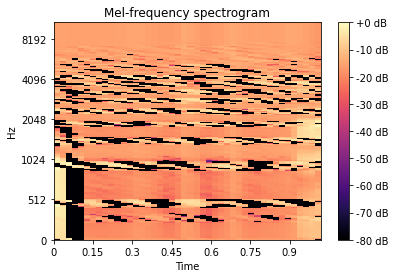

<Figure size 432x288 with 0 Axes>

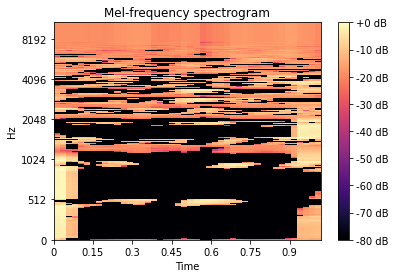

<Figure size 432x288 with 0 Axes>

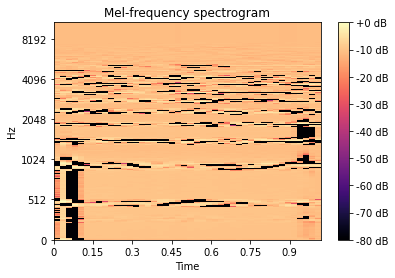

<Figure size 432x288 with 0 Axes>

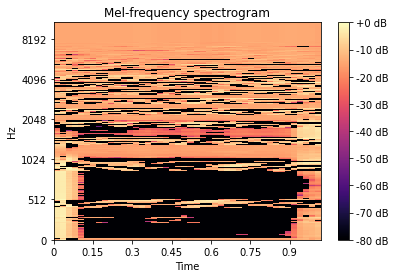

<Figure size 432x288 with 0 Axes>

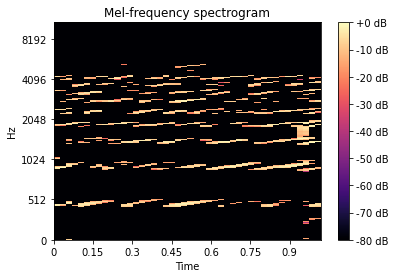

<Figure size 432x288 with 0 Axes>

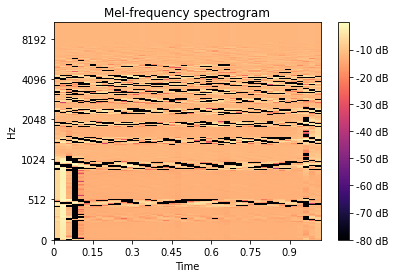

<Figure size 432x288 with 0 Axes>

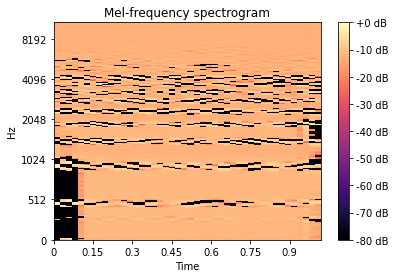

In [7]:
activations: List[np.ndarray] = activation_model.predict(input_data)
first_layer_activation: np.ndarray = activations[conv_block_indicis[0]]  # First convulsion layer in VGG model.

print(first_layer_activation.shape)

# First 10 neurons.
for neuron in range(10):
    display_mel_spectrogram(first_layer_activation[0, :,  :, neuron])
    create_audio_player(first_layer_activation[0, :,  :, neuron])